<h1 style="text-align:center">House Prices : Advanced Regression Techniques</h3>

<h3 style="text-align:center">Load Libraries</h3>

In [1]:
import numpy as np
import pandas as pd 

# Visualizations
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



# plot feature importance
from xgboost import plot_importance

from sklearn.feature_selection import SelectFromModel


C:\Users\Melan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Tweaking the style of the notebook to have centered plots

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<h3 style="text-align:center">Load Dataset</h3>

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<h3 style="text-align:center">Analyze Data</h3>

In [4]:
# Shape
print("Train_df shape:", train_df.shape ) 
print("Test_df shape:", test_df.shape )

Train_df shape: (1460, 81)
Test_df shape: (1459, 80)


In [5]:
# Peek at the first 5 rows of the data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Peek at the last 5 rows of the data
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
# Check type of each column
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We will check for the skewness of the SalePrice, our desired target feature

Skew is: 1.88287575977


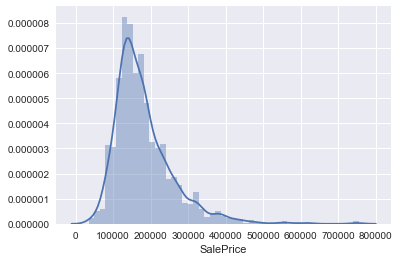

In [9]:
print( "Skew is:", train_df['SalePrice'].skew() )
sns.distplot(train_df['SalePrice'])

It is better to transform the data since it is skewed. A common way is to use the (natural) logarithm of the target variable, which is most likely work here since all values are positive (because logarithm is only positive).

Skew is: 0.121335062205


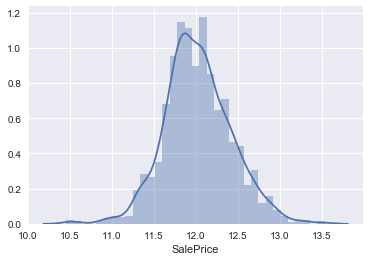

In [10]:
target = np.log(train_df['SalePrice'])
print( "Skew is:", target.skew() )
sns.distplot(target)

<h3 style="text-align:center">Exploring data</h3>

We will manipulate the features for them to be the most comprehensible for the machine learning algorithms

<b>1. Numerical Features</b>

In [11]:
num_features = train_df.select_dtypes(include=[np.number])
num_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

We can now examine the correlations between the numerical features and the target feature which is SalePrice.

In [12]:
corr = num_features.drop('Id', axis=1).corr()

# Features positively correlated with the sale prices
print( corr['SalePrice'].sort_values(ascending=False)[:10], "\n" )

# Features negatively correlated with the sale prices

print( corr['SalePrice'].sort_values(ascending=False)[-5:] )

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The correlations show how the features affect the sale price. <br>
A positive correlation means that the features increase/decrease as the sale prices increase/decrease. <br>
A negative correlation means that the features will decrease as the sale prices increase, as well as features will increase as the prices increase.

<u>OverallQual</u>

We examine the first feature that is highly correlated with the sale price


In [13]:
train_df['OverallQual'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

From the data description, the OverallQual indicates the rate of the overall material and finish of the house. <br>
The values are in the interval 1 to 10 with 1 : Very Poor to 10 : Very Excellent

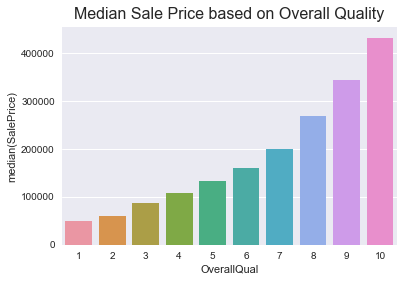

In [14]:
sns.barplot(x='OverallQual',
            y='SalePrice', 
            data=train_df, 
            estimator=np.median, # using the median estimator 
            ci=None) # Turn off error bars

plt.title('Median Sale Price based on Overall Quality', size=16, y=1.01)


<u>GrLivArea</u>

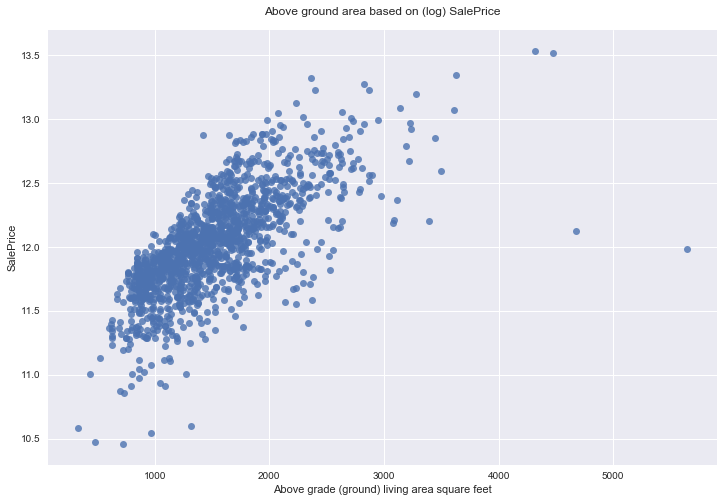

In [15]:
plt.figure(figsize=(12,8))

target = np.log(train_df['SalePrice'])
sns.regplot(x="GrLivArea", y=target, data=train_df
           , fit_reg=False)
plt.xlabel('Above grade (ground) living area square feet')
plt.title("Above ground area based on (log) SalePrice", y=1.02)

<u>GarageArea</u>

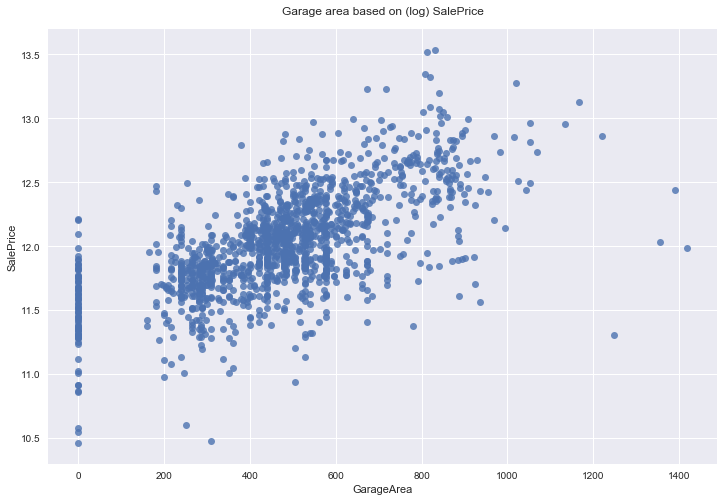

In [16]:
plt.figure(figsize=(12,8))

target = np.log(train_df['SalePrice'])
sns.regplot(x="GarageArea", y=target, data=train_df
           , fit_reg=False)

plt.title("Garage area based on (log) SalePrice", y=1.02)

We notice many homes with 0 for Garage Area inicating that they don't have a garage. <br>
There are a few ouliers as well. <br>
Outliers can affect a regression model by pulling the estimated regression line further away from the true regression line.<br>
Hence we will remove them.

In [17]:
train_df = train_df[train_df['GarageArea'] < 1200]

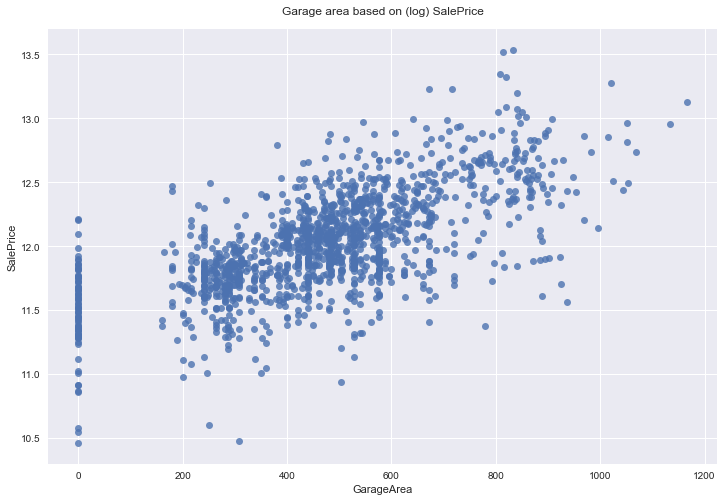

In [18]:
plt.figure(figsize=(12,8))

target = np.log(train_df['SalePrice'])
sns.regplot(x="GarageArea", y=target, data=train_df
           , fit_reg=False)

plt.title("Garage area based on (log) SalePrice", y=1.02)

<u>YrSold</u>

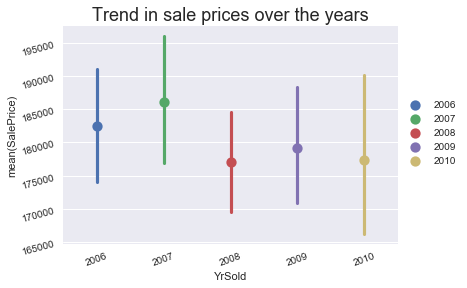

In [19]:
sns.pointplot(x='YrSold', y='SalePrice', hue= 'YrSold', data=train_df)

plt.legend(bbox_to_anchor=(1.2, 0.7))
plt.xticks(rotation=20)
plt.yticks(rotation=15)
plt.title("Trend in sale prices over the years", fontsize=18)

We see that 2010 sold houses at lower prices(in mean terms) 
and that 2007 has the highest prices

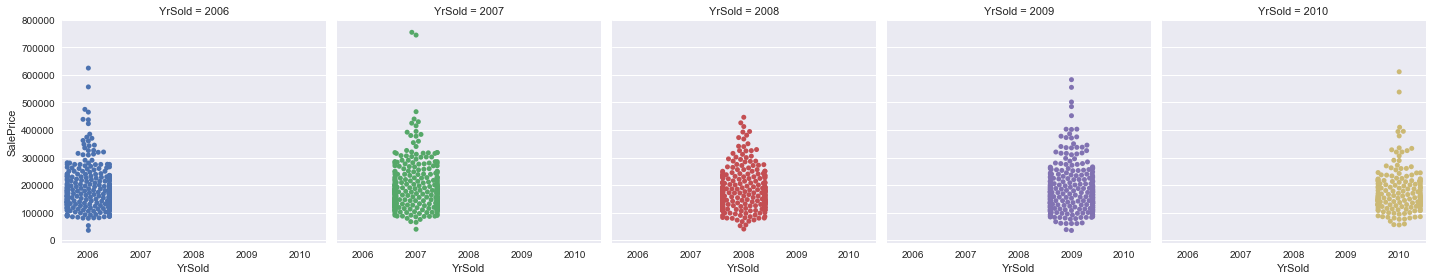

In [20]:
plt.figure(figsize=(8, 6))
sns.factorplot(x='YrSold',
               y='SalePrice', 
               data=train_df, 
               hue='YrSold', 
               col='YrSold', 
               kind='swarm',
               )  


<b>2. Categorical features</b>

Now we can examine categoricals features

In [21]:
categoricals = train_df.select_dtypes(include=[np.object])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


<b>3. Missing values</b>

This part will deal with NaN (Not a Number) values

In [22]:
nans = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)[:20])
nans.columns = ['NaN Count']
nans.index.name = 'Feature'
nans

,NaN Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


We will mostly use the documentation to help us understand the missing values.

<h3 style="text-align:center">Feature engineering</h3>

All the following transformation are applied for both the training and test data. 

<b>Missing values</b>

First let's see how many columns in both the train and test set contains NaN values

In [23]:
print("Number of columns with missing values in train set: ", train_df.loc[:, train_df.isnull().any()].shape[1])
print("Number of columns with missing values in test set: ", test_df.loc[:, test_df.isnull().any()].shape[1])


Number of columns with missing values in train set:  19
Number of columns with missing values in test set:  33


<b>Missing Numerical Values</b>

On the one hand, we proceed in the transformation of NaN values in Numerical columns

In [24]:
print("Numerical columns with NaN values in train set: \n",
      train_df.loc[:, train_df.isnull().any()].select_dtypes(include=[np.number]).columns, "\n")
print("Numerical columns with NaN values in test set: \n",
      test_df.loc[:, test_df.isnull().any()].select_dtypes(include=[np.number]).columns, "\n")

Numerical columns with NaN values in train set: 
 Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object') 

Numerical columns with NaN values in test set: 
 Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object') 



We observe some of the test set missing values are more from columns where there are not any in the training set

In [25]:
def fillNum_miss(dataset):
    """We impute the missing data by iterating over the columns having float 
    missing values and filling the missing values by the overall median of the
    column"""
    columns = dataset.loc[:, dataset.dtypes == "float64"].columns

    for column in columns:
        fill_value = dataset[column].median()
        dataset[column].fillna(value=fill_value, inplace=True)
        
fillNum_miss(train_df)
fillNum_miss(test_df)

<b>Missing categorical values</b>

In [26]:
print("Categorical columns with NaN values in train set: \n",
      train_df.loc[:, train_df.isnull().any()].select_dtypes(include=[np.object]).columns, "\n")
print("Numerical columns with NaN values in test set: \n",
      test_df.loc[:, test_df.isnull().any()].select_dtypes(include=[np.object]).columns, "\n")

Categorical columns with NaN values in train set: 
 Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object') 

Numerical columns with NaN values in test set: 
 Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object') 



Let's list the features with object missing values 

In [27]:
nans = pd.DataFrame(train_df.select_dtypes(include=[np.object]).isnull().sum().sort_values(ascending=False)[:20])
nans.columns = ['NaN Count']
nans.index.name = 'Categorical Features'
nans

,NaN Count
Categorical Features,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
GarageCond,81
GarageQual,81
GarageFinish,81
GarageType,81


According to the documentation, many NaN values correspond to an absence of the feature in question.<br>
For instance, 
<ul>
<li>PoolQC missing values correspond to an absence of pool</li>
<li>Garage related missing values correspond to an absence of garage </li>
<li>Basement related missing values correspond to an absence of basement</li>
</ul>

In [28]:
def fill_missing_cat_with_NA(dataset):
    columns_NA = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                  'GarageFinish', 'GarageType', 'GarageQual', 'GarageCond',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
    for column in columns_NA:
        dataset[column].fillna('NA', inplace=True)

fill_missing_cat_with_NA(train_df)
fill_missing_cat_with_NA(test_df)

In [29]:
train_df.loc[:, train_df.isnull().any()].select_dtypes(include=[np.object]).columns

Index(['MasVnrType', 'Electrical'], dtype='object')

Let's tackle the remaining missing categorical features by replacing them with the most common element

In [30]:
def fill_with_most_common_cat_value(dataset):
    columns = dataset.loc[:, dataset.isnull().any()].select_dtypes(include=[np.object]).columns
    for column in columns:
        dataset.fillna(dataset[column].value_counts().index[0], inplace=True)

fill_with_most_common_cat_value(train_df)
fill_with_most_common_cat_value(test_df)

<b>One Hot Encoding categorical features</b>

We will use a method called one hot encoding to transform categorical features.<br>
The method <u>pd.get_dummies</u> will allow us to do that. It will create one column for every possible value of each feature. <br>
Generally speaking, if you have <i>k</i> possible values for a categorical variable, you use <i>k-1</i> dummy variables to represent it.(because the kth variable can be inferred from the previous (k-1) variables)<br>

In [31]:
print("Shape of train_df before transformation: ", train_df.shape)    
print("Shape of test_df before transformation: ", test_df.shape)

# Concatenating train and test set for consistence in number of features
dataset = pd.concat(objs=[train_df, test_df], axis=0)
columns = dataset.select_dtypes(include=[np.object]).columns.tolist()
dataset = pd.get_dummies(dataset, columns=columns, drop_first=True)

row_train = train_df.shape[0]
train_df = dataset.iloc[:row_train, :]
row_test = test_df.shape[0]
test_df = dataset.iloc[-row_test:, :] # selecting the last 1459 values
test_df = test_df.drop('SalePrice', axis=1)
    
print("Shape of train_df after transformation: ", train_df.shape)
print("Shape of test_df after transformation: ", test_df.shape)    



Shape of train_df before transformation:  (1455, 81)
Shape of test_df before transformation:  (1459, 80)
Shape of train_df after transformation:  (1455, 268)
Shape of test_df after transformation:  (1459, 267)


<h3 style="text-align:center">Split-out dataset</h3>

In [32]:
# Test options and evaluation metric
num_folds = 10
seed = 46
# test_size = 0.20
test_size = 0.33
# scoring = 'neg_mean_squared_error'
scoring = 'r2'

In [33]:
X = train_df.drop(['Id', 'SalePrice'], axis=1).values
Y = np.log(train_df['SalePrice']).values
# Y = train_df['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=seed, 
                                                    test_size=test_size)



<h3>Test</h3>

In [34]:
lr = Lasso()

In [35]:
model = lr.fit(X_train, y_train)

In [36]:
print ("R^2 is: \n", model.score(X_test, y_test))


R^2 is: 
 0.809704613717


In [37]:
predictions = model.predict(X_test)


In [38]:
print ('RMSE is: \n', mean_squared_error(y_test, predictions))


RMSE is: 
 0.029652113668


In [39]:
lr = Lasso()
model = lr.fit(X_train, y_train)
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))


R^2 is: 
 0.809704613717
RMSE is: 
 0.029652113668


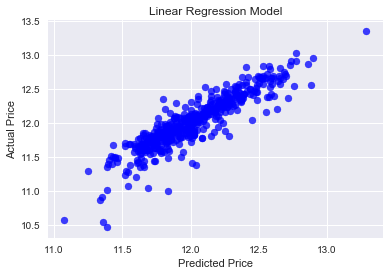

In [40]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

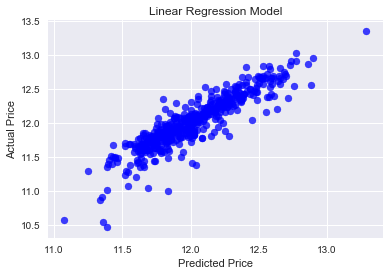

In [41]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

<h3 style="text-align:center">Evaluate algorithms : Standardization</h3>

We test several algorithms to see which one will perform the best. <br>
Note that the higher the r-squared value, the better.

In [42]:
# Standardize the dataset
pipelines = []
pipelines.append( ('ScaledLR', Pipeline( [('Scaler', StandardScaler()), 
                                          ('Linear Regression', LinearRegression())] ) ) )

pipelines.append( ('ScaledLasso', Pipeline( [('Scaler', StandardScaler()), 
                                          ('LASSO', Lasso())] ) ) )

pipelines.append( ('ScaledRidge', Pipeline( [('Scaler', StandardScaler()), 
                                          ('Ridge', Ridge())] ) ) )

pipelines.append( ('ScaledEN', Pipeline( [('Scaler', StandardScaler()), 
                                          ('ElasticNet', ElasticNet())] ) ) )

pipelines.append( ('ScaledKNN', Pipeline( [('Scaler', StandardScaler()), 
                                          ('KNN', KNeighborsRegressor())] ) ) )

pipelines.append( ('ScaledCART', Pipeline( [('Scaler', StandardScaler()), 
                                          ('CART', DecisionTreeRegressor())] ) ) )

pipelines.append( ('ScaledSVR', Pipeline( [('Scaler', StandardScaler()), 
                                          ('SVR', KNeighborsRegressor())] ) ) )

pipelines.append( ('ScaledRF', Pipeline( [('Scaler', StandardScaler()), 
                                          ('RF', RandomForestRegressor(random_state=seed))] ) ) )

pipelines.append( ('ScaledSVR', Pipeline( [('Scaler', StandardScaler()), 
                                          ('SVR', KNeighborsRegressor())] ) ) )

pipelines.append( ('ScaledXGB', Pipeline( [('Scaler', StandardScaler()), 
                                          ('XGB', XGBRegressor(seed=seed))] ) ) )


results = []
names = []

scoring='r2'

for name, model in pipelines: 
    kfold = KFold(n_splits=num_folds, random_state= seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.10f (%.10f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    


ScaledLR: -6606911616365371588608.0000000000 (14818658766695612547072.0000000000)
ScaledLasso: -0.0292449146 (0.0535204448)
ScaledRidge: 0.8837913499 (0.0439158365)
ScaledEN: -0.0292449146 (0.0535204448)
ScaledKNN: 0.7268522094 (0.0372326213)
ScaledCART: 0.7016180524 (0.0460026123)
ScaledSVR: 0.7268522094 (0.0372326213)
ScaledRF: 0.8340979918 (0.0264295646)
ScaledSVR: 0.7268522094 (0.0372326213)
ScaledXGB: 0.8801103304 (0.0218918896)


In [43]:
model = Ridge()
model = model.fit(X_train, y_train)
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.896956117163
RMSE is: 
 0.0160564530038


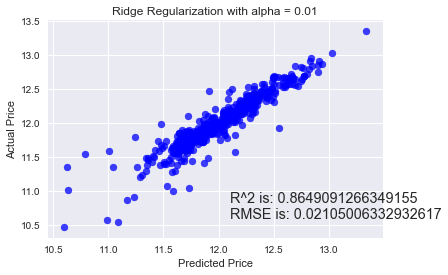

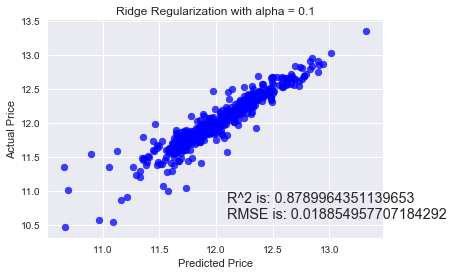

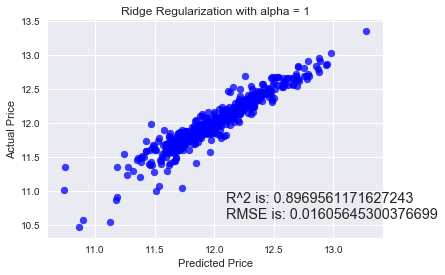

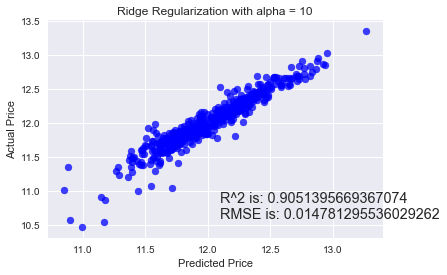

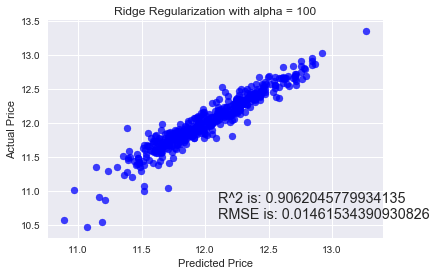

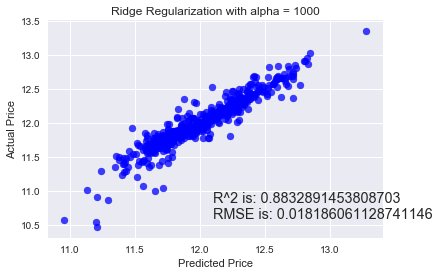

In [44]:
for i in range (-2, 4):
    alpha = 10**i
    rm = Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, y_test, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

<h3 style="text-align:center">Feature selection</h3>

In [129]:
model = RandomForestRegressor(random_state=seed)
model.fit(X_train, y_train)

array = []

# Fit model using each importance as a threshold
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = RandomForestRegressor(random_state=seed)
    selection_model.fit(select_X_train, y_train)
    # evaluate model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    root_mean_square = ( mean_squared_error(y_test, predictions) )**0.5
    r2score = r2_score(y_test,predictions)
    
#     array.append((r2score, select_X_train.shape[1]))
    array.append([thresh, r2score, select_X_train.shape[1]])
    
    print( "Thresh=%.8f, n=%d, r2_score: %.3f" % (thresh, select_X_train.shape[1], r2score) )

Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score: 0.860
Thresh=0.00000000, n=266, r2_score

Thresh=0.00047220, n=69, r2_score: 0.860
Thresh=0.00048152, n=68, r2_score: 0.854
Thresh=0.00049231, n=67, r2_score: 0.855
Thresh=0.00049918, n=66, r2_score: 0.852
Thresh=0.00051139, n=65, r2_score: 0.861
Thresh=0.00052271, n=64, r2_score: 0.857
Thresh=0.00055850, n=63, r2_score: 0.860
Thresh=0.00055894, n=62, r2_score: 0.858
Thresh=0.00056238, n=61, r2_score: 0.860
Thresh=0.00056356, n=60, r2_score: 0.857
Thresh=0.00056780, n=59, r2_score: 0.861
Thresh=0.00061839, n=58, r2_score: 0.861
Thresh=0.00062451, n=57, r2_score: 0.854
Thresh=0.00063135, n=56, r2_score: 0.855
Thresh=0.00064169, n=55, r2_score: 0.857
Thresh=0.00064616, n=54, r2_score: 0.858
Thresh=0.00065612, n=53, r2_score: 0.862
Thresh=0.00067850, n=52, r2_score: 0.862
Thresh=0.00068563, n=51, r2_score: 0.856
Thresh=0.00070850, n=50, r2_score: 0.858
Thresh=0.00074583, n=49, r2_score: 0.860
Thresh=0.00080489, n=48, r2_score: 0.855
Thresh=0.00084026, n=47, r2_score: 0.858
Thresh=0.00085721, n=46, r2_score: 0.857
Thresh=0.0008778

In [130]:
array

[[0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8603092223054577, 266],
 [0.0, 0.8

In [132]:
max(array, key=lambda x:x[1])

[5.0972989922981616e-06, 0.86624158493220826, 177]

In [108]:
# thresh = 5e-4
# thresh = 2e-4
thresh = 0.00000503

model = RandomForestRegressor(random_state=seed)
model.fit(X_train, y_train)
# select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# evaluate model
select_X_test = selection.transform(X_test)
# test
select_X_test = selection.transform(X_test)


print(select_X_train.shape, select_X_test.shape)

(974, 177) (481, 177)


In [109]:
model = Ridge(alpha=100)
# fit model on training data
model.fit(select_X_train, y_train)

# make predictions for test data
y_pred = model.predict(select_X_test)

predictions_r2_score = r2_score(y_test, y_pred)
prediction_rmse = mean_squared_error(y_test, y_pred)**0.5
print(predictions_r2_score)
print(prediction_rmse)

0.906171452543
0.120915282602


<h3 style=text-align:center>Final Model</h3>


In [45]:
X_fin = test_df.drop(['Id'], axis=1).values

In [46]:
model = Ridge(alpha=100)
model = model.fit(X_train, y_train)

# Make the predictions
predictions = model.predict(X_fin)

# transform the predictions (we applied log to skew the distribution)
# the function np.exp() will cancel the log
final_predictions = np.exp(predictions)

print(predictions)
print(final_predictions)

[ 11.71547225  11.51489812  12.1068001  ...,  12.13029072  11.6536866
  12.35556561]
[ 122451.73738167  100197.4604275   181099.1767097  ...,  185403.66921853
  115114.96428953  232249.06049406]


<h3 style="text-align:center"> Final Model with Dimensionality reduction </h3>

In [111]:
X_fin = test_df.drop(['Id'], axis=1).values

In [126]:
thresh = 0.00000503
model = RandomForestRegressor(random_state=seed)
model.fit(X_train, y_train)
# select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model 
selection_model = Ridge(alpha=100)
selection_model.fit(select_X_train, y_train)

# evaluate model
select_X_fin = selection.transform(X_fin)
y_fin = selection_model.predict(select_X_fin)


# transform the predictions (we applied log to skew the distribution)
# the function np.exp() will cancel the log
final_predictions = np.exp(y_fin)


print(predictions)
print(final_predictions)

[ 11.97173616  12.21414065  11.7834062   12.21414065  12.79942529
  11.7834062   11.7834062   11.97173616  12.21414065  12.21414065
  11.7834062   12.21414065  11.97173616  11.97173616  11.97173616
  13.06830481  11.97173616  11.7834062   11.55570344  11.55570344
  11.97173616  12.21414065  12.21414065  11.7834062   11.7834062
  11.03675573  11.97173616  11.97173616  11.55570344  11.7834062
  12.50454725  11.97173616  11.97173616  12.21414065  12.21414065
  11.55570344  11.97173616  11.7834062   11.55570344  11.97173616
  12.50454725  12.50454725  11.7834062   12.50454725  11.97173616
  11.97173616  12.21414065  11.7834062   11.97173616  11.7834062
  11.97173616  11.97173616  11.97173616  11.97173616  12.21414065
  12.50454725  11.7834062   11.7834062   11.7834062   11.7834062
  11.55570344  12.21414065  11.55570344  12.21414065  12.21414065
  12.21414065  12.21414065  11.97173616  11.7834062   11.97173616
  11.7834062   12.21414065  11.97173616  12.21414065  12.50454725
  11.97173616 

<h3 style=text-align:center>Submit the results</h3>

In [127]:
Id = test_df['Id'].values
data = { 'Id': Id, 'SalePrice': final_predictions }
df = pd.DataFrame(data, columns=['Id', 'SalePrice'])

Save to output file

In [128]:
df.to_csv("results2.csv", index=False)